Quick look at what happens in Perth:

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path    



In [52]:
root_dir = Path.cwd().parent.parent.parent

In [53]:
root_dir

PosixPath('/Users/saral/Documents/cricket/cricket_gardens')

In [54]:
# Perth ground data df

df_perth = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Perth Stadium.xlsx')
df_perth_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Perth Stadium.xlsx', sheet_name='Perth wicket takers')


In [55]:
df_perth

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Test number in series,Day 1 Pitch report,Day 2 Pitch report,Day 3,Unnamed: 11,Unnamed: 12,Notes
0,Australia,India,India,295 runs,Perth,"Nov 22-25, 2024",Test # 2561,1.0,"Mike Hussey has just done a pitch report. ""Typ...",Mike Hussey says the surface still looks prett...,Trent Copeland doing a pitch report: some crac...,NaN,NaN,The big number from yesterday was that there w...
1,Australia,Pakistan,Australia,360 runs,Perth,"Dec 14-17, 2023",Test # 2518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,West Indies,Australia,164 runs,Perth,"Nov 30-Dec 4, 2022",Test # 2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,New Zealand,Australia,296 runs,Perth,"Dec 12-15, 2019",Test # 2374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,India,Australia,146 runs,Perth,"Dec 14-18, 2018",Test # 2334,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Win ratio of Australia at Perth
df_perth[df_perth['Winner'] == 'Australia'].shape[0]

4

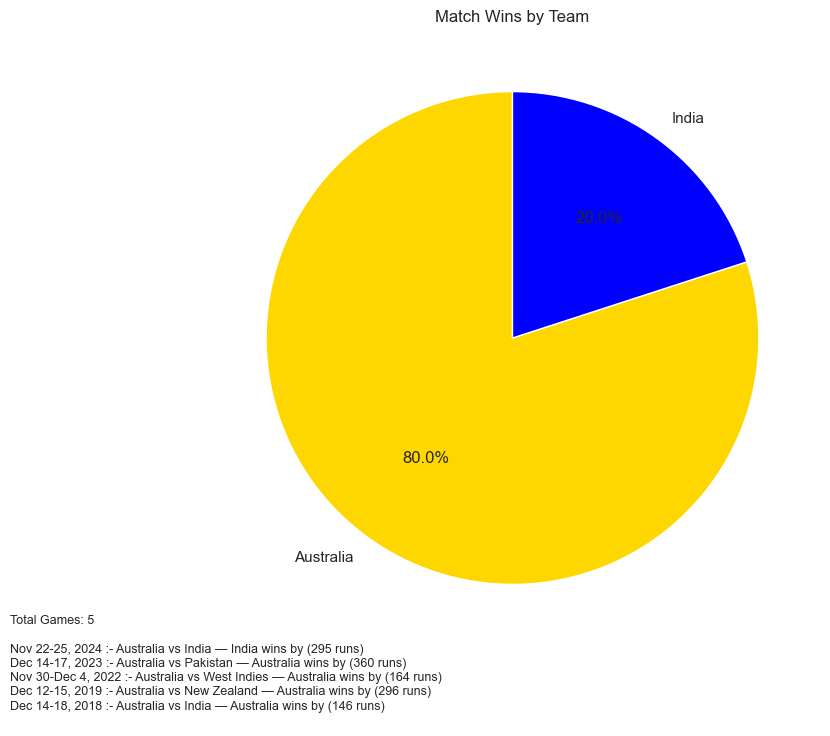

In [57]:
import matplotlib.pyplot as plt

# Count wins
win_counts = df_perth['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Prepare the game list text
games_text = f"Total Games: {df_perth.shape[0]}\n\n"
for idx, row in df_perth.iterrows():
    games_text += f"{row['Match Date']} :- {row['Team 1']} vs {row['Team 2']} — {row['Winner']} wins by ({row['Margin']})\n"

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Match Wins by Team")

# Add bounding box with games info
plt.gcf().text(0.01, 0.01, games_text, fontsize=9, va='bottom', ha='left', bbox=dict(facecolor='white', alpha=0.8))
plt.savefig(root_dir/'Articles/Perth stats/output/perth_win_ratio_pie_chart.png', 
            bbox_inches='tight', transparent=True, dpi=300)
plt.show()


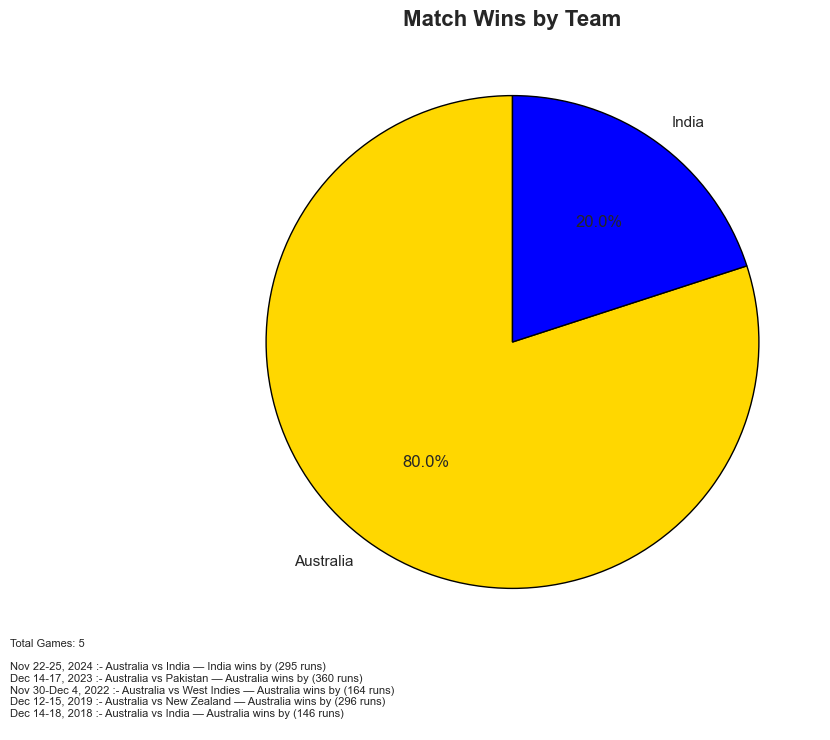

In [58]:
import matplotlib.pyplot as plt

# Count wins
win_counts = df_perth['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Prepare the game list text (last 10 games for readability)
games_text = f"Total Games: {df_perth.shape[0]}\n\n"
for idx, row in df_perth.tail(10).iterrows():
    games_text += f"{row['Match Date']} :- {row['Team 1']} vs {row['Team 2']} — {row['Winner']} wins by ({row['Margin']})\n"

# Plot pie chart
plt.figure(figsize=(10, 8), facecolor='none')  # transparent figure background
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops=dict(edgecolor='black', linewidth=1)  # bold slice edges
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Add bounding box with games info
plt.gcf().text(
    0.01, 0.01, 
    games_text, 
    fontsize=8, 
    va='bottom', 
    ha='left', 
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='none')  # semi-transparent box
)

# Save figure with transparent background
plt.savefig(
    root_dir/'Articles/Perth stats/output/perth_win_ratio_pie_chart_sqaure.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


In [59]:
# best bowlers in Perth
df_perth_wkts



,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10
0,NM Lyon (AUS),2018-2024,5,10,1389,231.3,39,605,29,6/128,20.86,2.61,47.89,1,2,-
1,MA Starc (AUS),2018-2024,5,10,1134,189.0,37,562,26,5/52,21.61,2.97,43.61,1,1,-
2,JR Hazlewood (AUS),2018-2024,5,9,838,139.4,48,314,16,4/29,19.62,2.24,52.37,1,-,-
3,PJ Cummins (AUS),2018-2024,5,9,934,155.4,35,395,15,3/34,26.33,2.53,62.26,-,-,-


/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_14512/156605271.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_perth_wkts['Player'], rotation=45, ha='right')


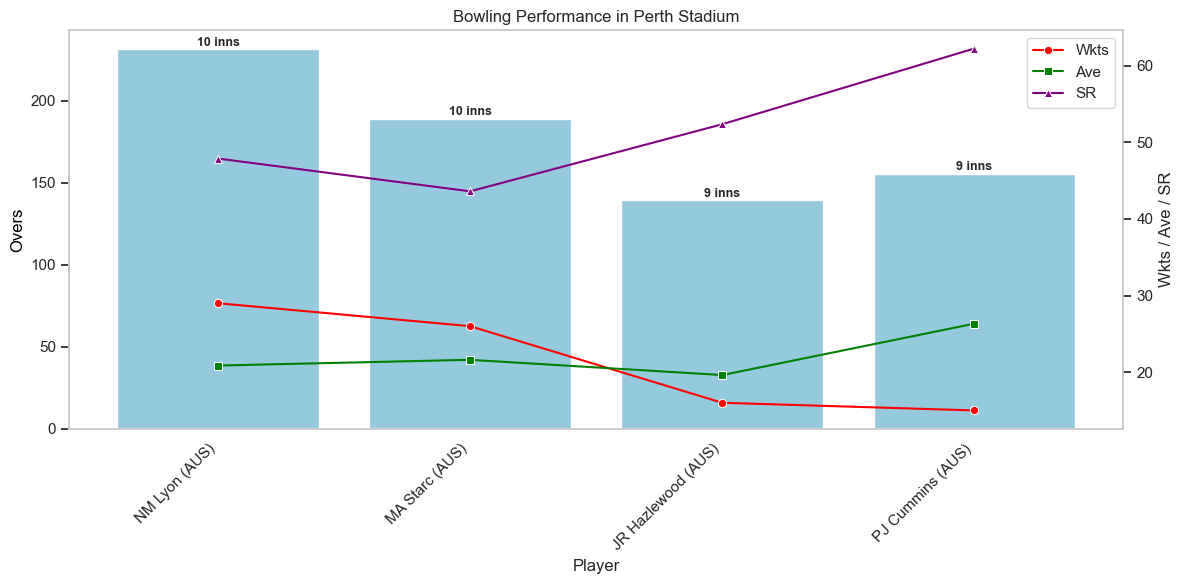

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # base style

# Set figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Overs
barplot = sns.barplot(x='Player', y='Overs', data=df_perth_wkts, ax=ax1, color='skyblue')
ax1.set_ylabel('Overs', color='black')
ax1.set_xticklabels(df_perth_wkts['Player'], rotation=45, ha='right')

# Annotate Inns at the top of each bar
for idx, row in df_perth_wkts.iterrows():
    ax1.text(idx, row['Overs'] + 0.2, str(row['Inns'])+ " inns", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Turn off grid for primary axis if desired
ax1.grid(False)

# Create second y-axis for Wkts, Ave, SR
ax2 = ax1.twinx()

# Line plots for Wkts, Ave, SR
sns.lineplot(x='Player', y='Wkts', data=df_perth_wkts, marker='o', color='red', label='Wkts', ax=ax2)
sns.lineplot(x='Player', y='Ave', data=df_perth_wkts, marker='s', color='green', label='Ave', ax=ax2)
sns.lineplot(x='Player', y='SR', data=df_perth_wkts, marker='^', color='purple', label='SR', ax=ax2)

ax2.set_ylabel('Wkts / Ave / SR')

# Turn off grid for secondary axis
ax2.grid(False)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper right')

plt.title("Bowling Performance in Perth Stadium")
plt.tight_layout()
plt.savefig(root_dir/'Articles/Perth stats/output/perth_bowling_performance.png', bbox_inches='tight')

plt.show()



/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_14512/3919141383.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_perth_wkts['Player'], rotation=45, ha='right')


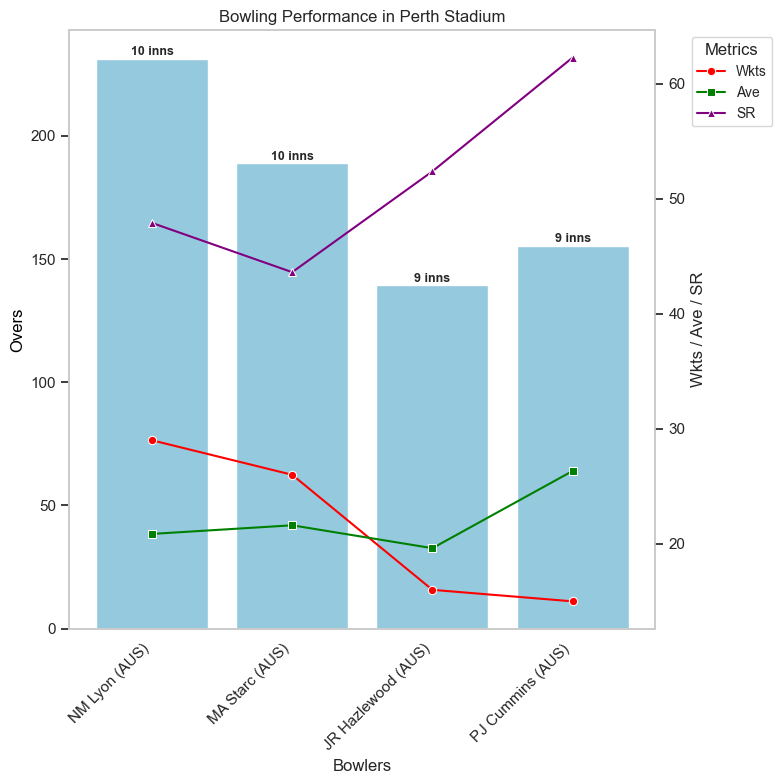

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # base style

fig, ax1 = plt.subplots(figsize=(8,8))

# Bar plot for Overs
barplot = sns.barplot(x='Player', y='Overs', data=df_perth_wkts, ax=ax1, color='skyblue')
ax1.set_ylabel('Overs', color='black')
ax1.set_xlabel("Bowlers", fontsize=12)

ax1.set_xticklabels(df_perth_wkts['Player'], rotation=45, ha='right')

# Annotate Inns at the top of each bar
for idx, row in df_perth_wkts.iterrows():
    ax1.text(idx, row['Overs'] + 0.2, str(row['Inns']) + " inns", ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.grid(False)

# Second y-axis for Wkts, Ave, SR
ax2 = ax1.twinx()
sns.lineplot(x='Player', y='Wkts', data=df_perth_wkts, marker='o', color='red', label='Wkts', ax=ax2)
sns.lineplot(x='Player', y='Ave', data=df_perth_wkts, marker='s', color='green', label='Ave', ax=ax2)
sns.lineplot(x='Player', y='SR', data=df_perth_wkts, marker='^', color='purple', label='SR', ax=ax2)

ax2.set_ylabel('Wkts / Ave / SR')
ax2.grid(False)

# Legend outside to avoid overlapping markers
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title='Metrics')

plt.title("Bowling Performance in Perth Stadium")
plt.tight_layout()
plt.savefig(
    root_dir/'Articles/Perth stats/output/perth_bowling_performance_square.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)
plt.show()
